# Sage Exercise and Practices

This notebook follows the book [Abstract Algebra: Theory and Applications](http://abstract.ups.edu/sage-aata.html). 

It is a collection of exercises and practices that I have done while reading the book. Hope this notebook can be useful for those who are learning abstract algebra using SageMath.

In [1]:
from sage import *
from sage.all import *
from sage.groups.matrix_gps.finitely_generated import *
from IPython.display import Markdown, display

## Chapter 2: Integers

In [2]:
# 2.3.1
print(factor(123456792))

# 2.3.2
gcd(84, 52)

2^3 * 3 * 59 * 87187


4

In [3]:
# 2.5.2 the Ackermann function
def ack(x, y):
    if x == 0: return y+1
    elif y == 0: return ack(x-1, 1)
    else:
        return ack(x-1, ack(x, y-1))

print(ack(3, 1))

# NOTE: this recursion can be really deep.

13


In [4]:
# 2.7
a = 1234567
b = 123
print(a.quo_rem(b))
print(a.divides(b))

print(gcd(1235688, 12444))
print(xgcd(1235688, 12444))

d, r, s = xgcd(1235688, 12444)  # gcd(a, b) = d = r * a + s * b
print(r * 1235688 + s * 12444)

(10037, 16)
False
12
(12, -10, 993)
12


In [5]:
# Prime, factors, and random prime.

print(is_prime(430400923))

print(factor(4923))

print(random_prime(1000, proof=True))

print(prime_range(100, 110))

a = 43000
for prime_factor, exponent in a.factor():
    print(f"{prime_factor}^{exponent}")

True
3^2 * 547
619
[101, 103, 107, 109]
2^3
5^3
43^1


In [6]:
# Exercise
a = random_prime(10^8, proof=True)
b = random_prime(10^8, proof=True)

print(f"a = {a}, b = {b}")

assert a.is_prime() and b.is_prime()

print(f"gcd(a, b) = {gcd(a, b)}")

d, r, s = xgcd(a, b)

print(f"gcd(a, b) = {d} = {r} * {a} + {s} * {b}")

a = 61291907, b = 44594521
gcd(a, b) = 1
gcd(a, b) = 1 = -20272160 * 61291907 + 27862601 * 44594521


In [7]:
c = 4598037234
c.factor()

2 * 3^2 * 7 * 36492359

In [8]:
print(7.divides(c))
print(11.divides(c))

True
False


## Chapter 3: Groups

### Integer Ring and Basic Operations

In [9]:
Z8 = Integers(8) # Create the ring of integers modulo 8.
print(type(Z8))  # Print type information.
print(Z8.list()) # Print the elements of the ring.

a = Z8.an_element()  # Get a random element of the ring.
print(a)
print(a.parent())
print(Z8.addition_table(names='elements')) # Operation table.

<class 'sage.rings.finite_rings.integer_mod_ring.IntegerModRing_generic_with_category'>
[0, 1, 2, 3, 4, 5, 6, 7]
0
Ring of integers modulo 8
+  0 1 2 3 4 5 6 7
 +----------------
0| 0 1 2 3 4 5 6 7
1| 1 2 3 4 5 6 7 0
2| 2 3 4 5 6 7 0 1
3| 3 4 5 6 7 0 1 2
4| 4 5 6 7 0 1 2 3
5| 5 6 7 0 1 2 3 4
6| 6 7 0 1 2 3 4 5
7| 7 0 1 2 3 4 5 6



### Symmetric Group

In [10]:
triangle = SymmetricGroup(3)
rho2 = triangle([3, 1, 2]) # Bottom row of the 'double-row' notation.
print(rho2) # Cycle notation.
print(triangle.domain()) # The underlying set.
print(rho2(triangle.domain().list())) # Apply the permutation to the domain.

mu1 = triangle([2, 3, 1])
print(mu1 * rho2) # Composition of permutations.

print(triangle.cayley_table(names='elements')) # Cayley table.

print(triangle.cayley_table(names=["id", "u1", "u3", "r1", "r2", "u2"])) # Cayley table with custom names.

(1,3,2)
{1, 2, 3}
[3, 1, 2]
()
      *       ()   (2,3)   (1,2) (1,2,3) (1,3,2)   (1,3)
       +------------------------------------------------
     ()|      ()   (2,3)   (1,2) (1,2,3) (1,3,2)   (1,3)
  (2,3)|   (2,3)      () (1,2,3)   (1,2)   (1,3) (1,3,2)
  (1,2)|   (1,2) (1,3,2)      ()   (1,3)   (2,3) (1,2,3)
(1,2,3)| (1,2,3)   (1,3)   (2,3) (1,3,2)      ()   (1,2)
(1,3,2)| (1,3,2)   (1,2)   (1,3)      () (1,2,3)   (2,3)
  (1,3)|   (1,3) (1,2,3) (1,3,2)   (2,3)   (1,2)      ()

 *  id u1 u3 r1 r2 u2
  +------------------
id| id u1 u3 r1 r2 u2
u1| u1 id r1 u3 u2 r2
u3| u3 r2 id u2 u1 r1
r1| r1 u2 u1 r2 id u3
r2| r2 u3 u2 id r1 u1
u2| u2 r1 r2 u1 u3 id



### Quarternions

In [11]:
Q = QuaternionGroup()
print(q_cayley := Q.cayley_table(names='letters')) # Cayley table.

identity = Q.identity()  # Obviously 'a' is the identity.

print([x.order() for x in q_cayley.column_keys()])  # Orders of the elements.

# We found that 'c' is the only element of order 2, 'c' should be -1.
minus_one = q_cayley.column_keys()[2]

print(minus_one * minus_one == identity) # Verify



*  a b c d e f g h
 +----------------
a| a b c d e f g h
b| b c d a h e f g
c| c d a b g h e f
d| d a b c f g h e
e| e f g h c d a b
f| f g h e b c d a
g| g h e f a b c d
h| h e f g d a b c

[1, 4, 2, 4, 4, 4, 4, 4]
True


### The Colplex Numbers

In [12]:
H = [CC(1), CC(-1)]
print(CC.multiplication_table(elements=H, names=['1', '-1'])) # Multiplication table.

H = [CC(1), CC(-1), CC(I), CC(-I)]
print(CC.multiplication_table(elements=H, names=['1', '-1', 'i', '-i'])) # Multiplication table.

 *   1 -1
  +------
 1|  1 -1
-1| -1  1

 *   1 -1  i -i
  +------------
 1|  1 -1  i -i
-1| -1  1 -i  i
 i|  i -i -1  1
-i| -i  i  1 -1



### Fancy Operation Table

In [13]:
from sage.matrix.operation_table import OperationTable

A4 = AlternatingGroup(4)
print(otab := OperationTable(A4, operation=lambda x, y: x * y, names='letters'))

.  a b c d e f g h i j k l
 +------------------------
a| a b c d e f g h i j k l
b| b c a f d e h i g l j k
c| c a b e f d i g h k l j
d| d g j a h k b e l c f i
e| e i k c g l a f j b d h
f| f h l b i j c d k a e g
g| g j d k a h e l b i c f
h| h l f j b i d k c g a e
i| i k e l c g f j a h b d
j| j d g h k a l b e f i c
k| k e i g l c j a f d h b
l| l f h i j b k c d e g a



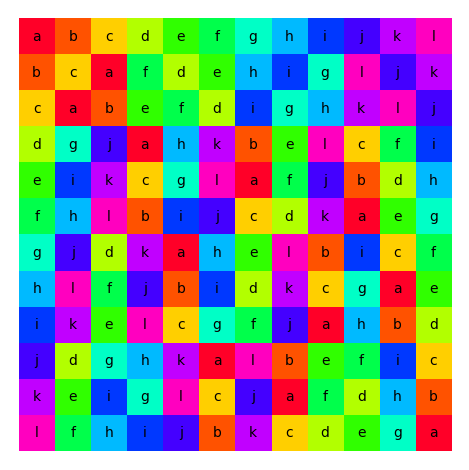

In [14]:
# Color table.
# This is really cool.
otab.color_table()

### Exercises

In [15]:
C8 = CyclicPermutationGroup(8)
D4 = DihedralGroup(4)

print(f'{C8.order()} == {D4.order()}', C8.order() == D4.order())

print(C8.cayley_table())
print(D4.cayley_table())

print(D4.is_abelian())

8 == 8 True
*  a b c d e f g h
 +----------------
a| a b c d e f g h
b| b c d e f g h a
c| c d e f g h a b
d| d e f g h a b c
e| e f g h a b c d
f| f g h a b c d e
g| g h a b c d e f
h| h a b c d e f g

*  a b c d e f g h
 +----------------
a| a b c d e f g h
b| b a d c f e h g
c| c g a e d h b f
d| d h b f c g a e
e| e f g h a b c d
f| f e h g b a d c
g| g c e a h d f b
h| h d f b g c e a

False


In [16]:
# Find the subgroup with order 4 in 'C'.
H1 = [x for x in C8.subgroups() if x.order() == 4][0]

# Find the three subgroups with order 4 in 'D'.
H2 = [x for x in D4.subgroups() if x.order() == 4][0]
H3 = [x for x in D4.subgroups() if x.order() == 4][1]
H4 = [x for x in D4.subgroups() if x.order() == 4][2]

print(H1.cayley_table())
print(H2.cayley_table())
print(H3.cayley_table())
print(H4.cayley_table())

# H1 and H3 have the same Cayley table.

*  a b c d
 +--------
a| a b c d
b| b c d a
c| c d a b
d| d a b c

*  a b c d
 +--------
a| a b c d
b| b a d c
c| c d a b
d| d c b a

*  a b c d
 +--------
a| a b c d
b| b c d a
c| c d a b
d| d a b c

*  a b c d
 +--------
a| a b c d
b| b a d c
c| c d a b
d| d c b a



## Chapter 4: Cyclic Groups

### Matrix Groups

In [17]:
display(Markdown("Actually its $GL_2(\mathbb{Q})$, but I can't figure out the way to deal with subgroups of $GL_2(\R)$. It just doesn't works."))

# Exercise 4.5.4
display(MatrixGroup(Matrix(QQ, 2, [0, 1, -1, 0])).list())

Actually its $GL_2(\mathbb{Q})$, but I can't figure out the way to deal with subgroups of $GL_2(\R)$. It just doesn't works.

(
[1 0]  [-1  0]  [ 0 -1]  [ 0  1]
[0 1], [ 0 -1], [ 1  0], [-1  0]
)